In [35]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime
import matplotlib.colors as mcolors

In [36]:
#read csv on wild fire data and create DataFrame
fire_data_path=("ODF_Fire_Occurrence_Data_2000-2022 (1).csv")
fire_data=pd.read_csv(fire_data_path)
fire_data.head()



,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013


In [37]:
# Our project only wants to review data in the last 5 years.
#Create copy of original csv
fire_data2= fire_data.copy()



In [38]:
#limit the year to the last 5 years (2022-5=2017 or greater
#reduce dataframe to remove data prior to 2017
fire_data2.drop(fire_data2.loc[fire_data2["FireYear"]<2017].index, inplace=True)
fire_data2.head()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
40,109111,STAT,2017,NOA,Forest Grove,Forest Grove,17-531032-18,Raven's Ridge Fire,C,19.25,...,Lvl 2 Limited Shutdown,08/19/2017 03:35:00 PM,08/19/2017 03:40:00 PM,08/19/2017 03:37:00 PM,08/22/2017 05:00:00 PM,09/04/2017 12:00:00 AM,09/04/2017 02:01:00 PM,53,531,032
41,109245,STAT,2017,SOA,Southwest Oregon,Grants Pass,17-712536-18,Sykes Creek,B,0.50,...,Lvl 4 Complete Shutdown,09/07/2017 02:00:00 PM,09/07/2017 03:30:00 PM,09/07/2017 03:20:00 PM,09/13/2017 12:52:00 PM,09/08/2017 12:00:00 AM,09/26/2017 02:05:00 PM,71,712,536
42,106510,STAT,2017,SOA,Southwest Oregon,Grants Pass,17-712680-17,N Old Stage Road,A,0.01,...,Outside Closed Fire Season,05/30/2017 01:00:00 PM,05/30/2017 01:29:00 PM,05/30/2017 01:29:00 PM,06/02/2017 08:34:00 AM,05/30/2017 12:00:00 AM,06/05/2017 11:36:00 AM,71,712,680
43,109019,STAT,2017,SOA,Western Lane,Veneta,17-781047-18,Canary,A,0.01,...,Lvl 2 Limited Shutdown,09/01/2017 09:00:00 AM,09/01/2017 10:53:00 AM,09/01/2017 10:45:00 AM,09/01/2017 12:00:00 PM,09/01/2017 12:00:00 AM,09/01/2017 01:09:00 PM,78,781,047
44,108316,STAT,2017,EOA,Central Oregon,John Day,17-952032-18,Trent Creek,C,79.60,...,Does Not Apply - Eastern OR,08/10/2017 06:45:00 PM,08/10/2017 07:13:00 PM,08/10/2017 07:10:00 PM,08/16/2017 03:00:00 PM,08/10/2017 12:00:00 AM,09/03/2017 10:47:00 AM,95,952,032


In [39]:
#export fire data as csv
fire_data2.to_csv("../Wildfires-OR-17.22.csv", index_label="fire_data2")

In [40]:
#list column names
list(fire_data2.columns)

['Serial',
 'FireCategory',
 'FireYear',
 'Area',
 'DistrictName',
 'UnitName',
 'FullFireNumber',
 'FireName',
 'Size_class',
 'EstTotalAcres',
 'Protected_Acres',
 'HumanOrLightning',
 'CauseBy',
 'GeneralCause',
 'SpecificCause',
 'Cause_Comments',
 'Lat_DD',
 'Long_DD',
 'LatLongDD',
 'FO_LandOwnType',
 'Twn',
 'Rng',
 'Sec',
 'Subdiv',
 'LandmarkLocation',
 'County',
 'RegUseZone',
 'RegUseRestriction',
 'Industrial_Restriction',
 'Ign_DateTime',
 'ReportDateTime',
 'Discover_DateTime',
 'Control_DateTime',
 'CreationDate',
 'ModifiedDate',
 'DistrictCode',
 'UnitCode',
 'DistFireNumber']

In [41]:
fire_data2.dtypes



Serial                      int64
FireCategory               object
FireYear                    int64
Area                       object
DistrictName               object
UnitName                   object
FullFireNumber             object
FireName                   object
Size_class                 object
EstTotalAcres             float64
Protected_Acres           float64
HumanOrLightning           object
CauseBy                    object
GeneralCause               object
SpecificCause              object
Cause_Comments             object
Lat_DD                    float64
Long_DD                   float64
LatLongDD                  object
FO_LandOwnType             object
Twn                        object
Rng                        object
Sec                       float64
Subdiv                     object
LandmarkLocation           object
County                     object
RegUseZone                 object
RegUseRestriction          object
Industrial_Restriction     object
Ign_DateTime  

In [42]:
fire_data2['Control_DateTime'] = pd.to_datetime(fire_data2['Control_DateTime'])
fire_data2['Ign_DateTime']=pd.to_datetime(fire_data2['Ign_DateTime'])

C:\Users\ctetreault\AppData\Local\Temp\ipykernel_31752\591089302.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fire_data2['Control_DateTime'] = pd.to_datetime(fire_data2['Control_DateTime'])
C:\Users\ctetreault\AppData\Local\Temp\ipykernel_31752\591089302.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fire_data2['Ign_DateTime']=pd.to_datetime(fire_data2['Ign_DateTime'])


In [43]:
#Group District Name as index for data
district_index = fire_data2.set_index(["DistrictName",])
#create dataframe
county_data=pd.DataFrame({"County": fire_data2["County"],
                          "Year": fire_data2["FireYear"],
                          "Fire Name": fire_data2["FireName"],
                          "Acres" : fire_data2["EstTotalAcres"],
                          "Cause of Fire": fire_data2["SpecificCause"]})

county_data

,County,Year,Fire Name,Acres,Cause of Fire
40,Washington,2017,Raven's Ridge Fire,19.25,NaN
41,Jackson,2017,Sykes Creek,0.50,Lightning
42,Josephine,2017,N Old Stage Road,0.01,Warming Fire
43,Lane,2017,Canary,0.01,Warming Fire
44,Wheeler,2017,Trent Creek,79.60,Lightning
...,...,...,...,...,...
23485,Klamath,2021,Road 2430,0.75,Heat from Vehicle Manifold or Exhaust
23486,Lane,2022,Spruce Path,0.01,"Campfire Left Unattended (camp site, cooking)"
23487,Umatilla,2021,Bone Canyon,67.43,Lightning
23488,Umatilla,2022,Milepost 231,0.10,Burning Vehicle or Equipment


<Axes: title={'center': 'Oregon Counties Burning'}, xlabel='Counties with Wildfires', ylabel='Number of Fires'>

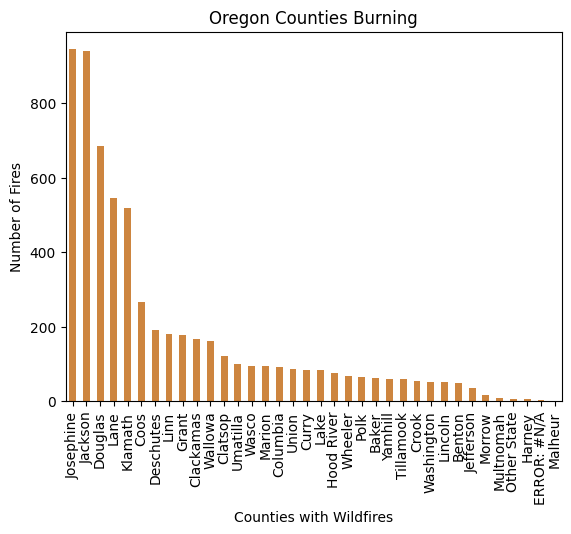

In [44]:
fig1=fire_data2[["County", "FireYear"]]
Number_of_Fires= fire_data2["County"].value_counts()
Number_of_Fires.plot(kind="bar", color="peru", xlabel="Counties with Wildfires", ylabel="Number of Fires",title=("Oregon Counties Burning"))

<Axes: title={'center': 'General Cause of Fires'}, xlabel='Cause of Fire', ylabel='Count of Fires'>

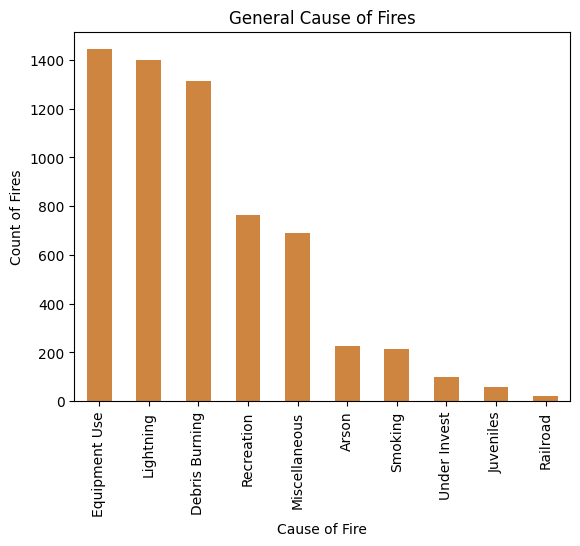

In [45]:
fig2=fire_data2[["GeneralCause", "FireYear"]]
Cause_of_Fire_Count= fire_data2["GeneralCause"].value_counts()
Cause_of_Fire_Count
Cause_of_Fire_Count.plot(kind="bar", color="peru", xlabel="Cause of Fire", ylabel="Count of Fires", title=("General Cause of Fires"))

In [46]:
#identify what the estimated acres burned is for each year and county. 



In [47]:
#Create chart for estimated acres burned in each county and year
